In [19]:
import pandas as pd
import numpy as np

In [34]:
#Read train,test and sample_submission file by specifying the location
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [35]:
# Shape of training and test datasets
print ('Training dataset consists of {} rows with {} attributes'.format(train.shape[0], train.shape[1]-1))
# Shape of training and test datasets
print ('Testing dataset consists of {} rows.'.format(test.shape[0]))

Training dataset consists of 552 rows with 16 attributes
Testing dataset consists of 138 rows.


In [36]:
#Combine both train and test for all data transformations
combine = pd.concat([train,test], ignore_index=False )

In [37]:
del combine['E']

In [38]:
#Categorical COlumns and no of unique values in each column
categories = ['A','D','F','G','I','J','L','M']

for i in categories:
    print('Category {} with {} unique values'.format(i,len(combine[i].unique())))
    
#Mode Imputation for Missing categorical Values

values = ['b','u','c','v','t','f','f','g']

j = 0
for i in categories:
    combine[i] = combine[i].apply(lambda x: values[j] if x!= x else x)
    j += 1

Category A with 3 unique values
Category D with 4 unique values
Category F with 15 unique values
Category G with 10 unique values
Category I with 2 unique values
Category J with 2 unique values
Category L with 2 unique values
Category M with 3 unique values


In [39]:
#Mean Imputation for Numerical values

value = combine['B'].mean()
combine['B'] = combine['B'].apply(lambda x: value if x!= x else x)

value = combine['N'].mean()
combine['N'] = combine['N'].apply(lambda x: value if x!= x else x)

In [40]:
for i in categories:
    combine[i] = combine[i].astype('category')
    combine[i] = combine[i].cat.codes

In [41]:
combine.head()

,A,B,C,D,F,G,H,I,J,K,L,M,N,O,P,id
0,1,18.42,10.415,2,0,7,0.125,1,0,0,0,0,120.0,375,1.0,1
1,0,21.75,11.750,1,1,7,0.250,0,0,0,1,0,180.0,0,1.0,2
2,1,30.17,1.085,2,1,7,0.040,0,0,0,0,0,170.0,179,1.0,3
3,1,22.67,2.540,2,1,3,2.585,1,0,0,0,0,0.0,0,0.0,4
4,0,36.00,1.000,1,1,7,2.000,1,1,11,0,0,0.0,456,0.0,5


In [42]:
#Explore and try to build some new features

from math import log,sqrt,sin,exp,cos

combine['new1'] = combine.apply(lambda x: exp(x['O'])/(3*exp(x['I'])) if x['O']==0 else x['O']/(3*exp(x['I'])) ,axis=1)

combine['new2'] = combine.apply(lambda x: x['C']/x['H'] if x['H']!=0 else 0 ,axis=1)

combine['new3'] = combine.apply(lambda x: x['O']/exp(x['K']),axis=1)

combine['new4'] = combine.apply(lambda x: sin(x['O'])/exp(x['H']),axis=1)


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combine[['B', 'C', 'H', 'N','O','new1','new2','new3','new4']] = scaler.fit_transform(combine[['B', 'C', 'H', 'N','O','new1','new2','new3','new4']])

In [44]:
combine.head()

,A,B,C,D,F,G,H,I,J,K,L,M,N,O,P,id,new1,new2,new3,new4
0,1,0.070226,0.371964,2,0,7,0.004386,1,0,0,0,0,0.060,0.00375,1.0,1,0.001376,0.175411,3.750000e-03,0.097220
1,0,0.120301,0.419643,1,1,7,0.008772,0,0,0,1,0,0.090,0.00000,1.0,2,0.000006,0.098947,0.000000e+00,0.500823
2,1,0.246917,0.038750,2,1,7,0.001404,0,0,0,0,0,0.085,0.00179,1.0,3,0.001786,0.057105,1.790000e-03,0.534862
3,1,0.134135,0.090714,2,1,3,0.090702,1,0,0,0,0,0.000,0.00000,0.0,4,0.000000,0.002069,0.000000e+00,0.500823
4,0,0.334586,0.035714,1,1,7,0.070175,1,1,11,0,0,0.000,0.00456,0.0,5,0.001674,0.001053,7.615976e-08,0.470176


In [45]:
a  = train.shape[0]

del train,test

train = combine[:a]
test = combine[a:]
del combine

output = train['P']
train.drop('P',axis=1,inplace=True)
test.drop('P',axis=1,inplace=True)

train_id = train['id'].copy()
test_id = test['id'].copy()

Feature ranking:
1. A feature 10 (0.004009)
2. B feature 0 (0.004039)
3. C feature 11 (0.005489)
4. D feature 17 (0.010012)
5. F feature 18 (0.013731)
6. G feature 5 (0.014053)
7. H feature 8 (0.014304)
8. I feature 3 (0.018809)
9. J feature 9 (0.023345)
10. K feature 4 (0.028803)
11. L feature 15 (0.029566)
12. M feature 13 (0.030804)
13. N feature 6 (0.035021)
14. O feature 16 (0.037887)
15. id feature 14 (0.039978)
16. new1 feature 1 (0.047922)
17. new2 feature 2 (0.061005)
18. new3 feature 12 (0.062050)
19. new4 feature 7 (0.519174)


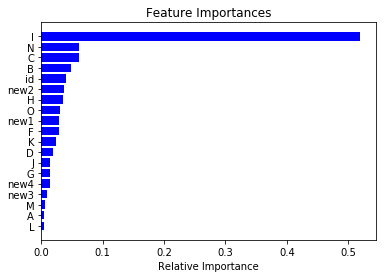

In [46]:
#See if new features are important

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Build a forest and compute the feature importances
forest = RandomForestRegressor(n_estimators=250,random_state=0)

forest.fit(train, output)
importances = forest.feature_importances_
indices = np.argsort(importances)

features = train.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. %s feature %d (%f)" % (f + 1, features[f],indices[f], importances[indices[f]]))


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [53]:
##LightGBM###

import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import gc


lgb_params = {
    'boosting_type': 'gbdt',
          'max_depth' : 3,
          'objective': 'regression_l2', 
          'nthread': 5, 
          'num_leaves': 32, 
          'learning_rate': 0.1, 
          'max_bin': 256, 
          'subsample_for_bin': 200,
          'subsample': 1, 
          'subsample_freq': 1, 
          'colsample_bytree': 0.8, 
          'reg_alpha': 0.8, 
          'reg_lambda': 1.2,
          'min_split_gain': 0.5, 
          'min_child_weight': 2, 
          'min_child_samples': 5, 
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'l2'}

nrounds = 2000  
kfolds = 5

oof_train=pd.DataFrame({'id':train_id, 'P':0})

best=[]
score=[]

skf = SKF( n_splits=kfolds, shuffle=True,random_state=123)
i=0
for train_index, test_index in skf.split(train, output):
    print('Fold {0}'.format(i + 1))
    X_train, X_val = train.iloc[train_index], train.iloc[test_index]
    y_train, y_val = output[train_index],output[test_index]

    ltrain = lgb.Dataset(X_train,y_train)
    lval = lgb.Dataset(X_val,y_val, reference= ltrain)

    gbdt = lgb.train(lgb_params, ltrain, nrounds, valid_sets=lval,verbose_eval=50,early_stopping_rounds=25)
    
    bst=gbdt.best_iteration
    pred=gbdt.predict(X_val, num_iteration=bst)
    oof_train.loc[test_index,"output"]= pred

    for i in range(len(pred)):
        if pred[i] > 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
            
    scr=accuracy_score(y_val,pred) 
    
    best.append(bst)    
    score.append(scr)
    i+=1
    
    del ltrain
    del lval
    del gbdt
    gc.collect()

print(np.mean(score))
print(np.mean(best))

#oof_train.to_csv('../output/oof/lgb3_oof_tr.csv', index=False)

Fold 1
Training until validation scores don't improve for 25 rounds.
[50]	valid_0's l2: 0.115222
Early stopping, best iteration is:
[26]	valid_0's l2: 0.11512
Fold 112
Training until validation scores don't improve for 25 rounds.
[50]	valid_0's l2: 0.112325
Early stopping, best iteration is:
[28]	valid_0's l2: 0.112325
Fold 112
Training until validation scores don't improve for 25 rounds.
[50]	valid_0's l2: 0.0864672
Early stopping, best iteration is:
[27]	valid_0's l2: 0.0864672
Fold 111
Training until validation scores don't improve for 25 rounds.
Early stopping, best iteration is:
[20]	valid_0's l2: 0.103783
Fold 111
Training until validation scores don't improve for 25 rounds.
[50]	valid_0's l2: 0.0903663
Early stopping, best iteration is:
[26]	valid_0's l2: 0.0903663
0.844324324324
25.4


In [54]:
best_nrounds=int(round(np.mean(best)))
ltrain=lgb.Dataset(train,output)

gbdt = lgb.train(lgb_params, ltrain, best_nrounds)

gb_preds = gbdt.predict(test) 

sub = pd.DataFrame()
sub['id'] = test_id
sub['P'] = gb_preds

sub['P'] = [1 if x >= 0.5 else 0 for x in sub['P']]

sub.to_csv("lgb.csv",index=False) 

In [16]:
#Save prob to use in ensemble model

sub = pd.DataFrame()
sub['id'] = test_id
sub['P'] = gb_preds

sub.to_csv("lgmboost_probability.csv",index=False) 

In [49]:
#Xgboost

import xgboost as xgb

xgb_params = {
    'objective':'binary:logistic',
    'eval_metric':'error',
    'eta':0.05,
    'max_depth':5,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'min_child_weight':4
}

nrounds = 2500 
kfolds = 5  

In [50]:
#Cross validation score

from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import gc

best=[]
score=[]

oof_train=pd.DataFrame({'id':train_id, 'P':0})

kfolds = 5
nrounds = 2500

strain = train

skf = SKF( n_splits=kfolds, shuffle=True,random_state=123)

i=0

for train_index, test_index in skf.split(train, output):
    
    print('Fold {0}'.format(i + 1))
    X_train, X_val = train.iloc[train_index], train.iloc[test_index]
    y_train, y_val = output[train_index],output[test_index]

    dtrain = xgb.DMatrix(X_train,y_train)
    dval = xgb.DMatrix(X_val,y_val)
    watchlist = [(dtrain, 'train'), (dval, 'eval')]

    gbdt = xgb.train(xgb_params, dtrain, nrounds, watchlist,verbose_eval=50,early_stopping_rounds=25)  
    
    bst=gbdt.best_ntree_limit
    pred=gbdt.predict(dval, ntree_limit=bst)
    oof_train.loc[test_index,"P"]= pred
    
    for i in range(len(pred)):
        if pred[i] > 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
            
    scr=accuracy_score(y_val,pred) 
    
    best.append(bst)    
    score.append(scr)
    i+=1
    
    del dtrain
    del dval
    del gbdt
    gc.collect()
    
print(score)

Fold 1
[0]	train-error:0.131519	eval-error:0.18018
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 25 rounds.
Stopping. Best iteration:
[0]	train-error:0.131519	eval-error:0.18018

Fold 112
[0]	train-error:0.126984	eval-error:0.153153
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 25 rounds.
Stopping. Best iteration:
[3]	train-error:0.106576	eval-error:0.135135

Fold 112
[0]	train-error:0.20362	eval-error:0.272727
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 25 rounds.
Stopping. Best iteration:
[11]	train-error:0.115385	eval-error:0.072727

Fold 111
[0]	train-error:0.20362	eval-error:0.190909
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 25 r

In [52]:
#Final output based on parameters obtained from CV.

dtest=xgb.DMatrix(test)

best_nrounds=int(round(np.mean(best)))

dtrain=xgb.DMatrix(train,output)

watchlist = [(dtrain, 'train')]
gbdt = xgb.train(xgb_params, dtrain, best_nrounds,watchlist,verbose_eval=50,early_stopping_rounds=25)

pred=gbdt.predict(dtest)

value = []
count = 0
for i in pred:
    if i >= 0.5:
        value.append(1)
        count += 1
    else:
        value.append(0)

print(count)

sub = pd.DataFrame()
sub['id'] = test_id
sub['P'] = pred

sub['P'] = [1 if x >= 0.5 else 0 for x in sub['P']]

sub.to_csv("xgboost_hotencoding.csv",index=False) 

[0]	train-error:0.119565
Will train until train-error hasn't improved in 25 rounds.
73
